##### To Do

- Load in the train data for the Housing prices Competition.
- Understand the data
- Using the skills learnt, improve on your submission from exercise 1
- build a model on train data
- make prediction on test
- submit predictions on the kaggle competition.

In [246]:
#import libraries
import pandas as pd
import numpy as np






In [247]:
#load data
iowa_file_path = '../data/Housing Prices Competition/train.csv'

df = pd.read_csv(iowa_file_path)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [248]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [249]:
# remove outliers from the target values    
# remove outliers that are having a z score of more than 2.5 
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['SalePrice']))
df = df[z<2.5]



In [250]:
missing = df.isnull().sum()
missing = missing[missing >0]
missing.sort_values(inplace=True)
missing


Electrical         1
MasVnrArea         7
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
BsmtExposure      38
BsmtFinType2      38
GarageType        81
GarageQual        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
LotFrontage      256
FireplaceQu      690
MasVnrType       866
Fence           1142
Alley           1329
MiscFeature     1366
PoolQC          1414
dtype: int64

In [251]:
# decide to drop columns with more than 38 missing values
columns_to_drop = missing[missing > 38].index
df.drop(columns_to_drop, axis=1, inplace=True)


In [252]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1413.000000,1420.000000,1420.000000,...,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,731.988028,57.278169,10325.434507,6.019014,5.585211,1970.483099,1984.323239,93.378627,426.010563,47.354225,...,90.840845,45.391549,22.199296,3.183803,14.575352,2.445775,44.714085,6.325352,2007.816197,173066.058451
std,422.084716,42.651340,9899.161524,1.307669,1.112644,30.047585,20.653568,162.960536,436.232893,162.835396,...,122.018691,65.667260,61.271589,28.353614,54.656509,38.006479,503.012517,2.700415,1.328133,63183.893694
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,733.500000,50.000000,9362.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,375.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,1096.250000,70.000000,11376.250000,7.000000,6.000000,2000.000000,2003.000000,149.000000,695.000000,0.000000,...,168.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,207125.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,378500.000000


In [253]:
# list all data types of columns 
col_object =df.select_dtypes(include='object').columns.tolist()

In [254]:
col_number = df.select_dtypes(include="number").columns.tolist()


In [255]:
# find the common items in col object and col number
common = list(set(col_object).intersection(col_number))
common

[]

In [256]:
# write a loop to fin all Unique dtypes in the columns with example of one entry of each type
for col in df.columns:
    print(f'{col} : {df[col].iloc[0]}')



Id : 1
MSSubClass : 60
MSZoning : RL
LotArea : 8450
Street : Pave
LotShape : Reg
LandContour : Lvl
Utilities : AllPub
LotConfig : Inside
LandSlope : Gtl
Neighborhood : CollgCr
Condition1 : Norm
Condition2 : Norm
BldgType : 1Fam
HouseStyle : 2Story
OverallQual : 7
OverallCond : 5
YearBuilt : 2003
YearRemodAdd : 2003
RoofStyle : Gable
RoofMatl : CompShg
Exterior1st : VinylSd
Exterior2nd : VinylSd
MasVnrArea : 196.0
ExterQual : Gd
ExterCond : TA
Foundation : PConc
BsmtQual : Gd
BsmtCond : TA
BsmtExposure : No
BsmtFinType1 : GLQ
BsmtFinSF1 : 706
BsmtFinType2 : Unf
BsmtFinSF2 : 0
BsmtUnfSF : 150
TotalBsmtSF : 856
Heating : GasA
HeatingQC : Ex
CentralAir : Y
Electrical : SBrkr
1stFlrSF : 856
2ndFlrSF : 854
LowQualFinSF : 0
GrLivArea : 1710
BsmtFullBath : 1
BsmtHalfBath : 0
FullBath : 2
HalfBath : 1
BedroomAbvGr : 3
KitchenAbvGr : 1
KitchenQual : Gd
TotRmsAbvGrd : 8
Functional : Typ
Fireplaces : 0
GarageCars : 2
GarageArea : 548
PavedDrive : Y
WoodDeckSF : 0
OpenPorchSF : 61
EnclosedPorch : 0

In [257]:
# find out for col_objects, how many unique values are there in each column
# put this in a series and show the series sorted 

unique_values = df[col_object].nunique().sort_values()

unique_values

Street            2
Utilities         2
CentralAir        2
LandSlope         3
PavedDrive        3
ExterQual         4
LandContour       4
LotShape          4
BsmtQual          4
BsmtCond          4
KitchenQual       4
BsmtExposure      4
ExterCond         5
MSZoning          5
LotConfig         5
BldgType          5
Electrical        5
HeatingQC         5
Foundation        6
BsmtFinType1      6
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
Functional        7
Condition2        8
RoofMatl          8
HouseStyle        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [258]:
unique_values[unique_values>10].index

Index(['Exterior1st', 'Exterior2nd', 'Neighborhood'], dtype='object')

In [259]:
# select all categorical values that are having less than 7 unique values
col_categoircal = df[col_object].nunique()[df[col_object].nunique()<10].index.tolist()
col_categoircal

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [260]:
# fill missing values in numerical data with mean
# columns with nummerical value are stored in col_number
df[col_number] = df[col_number].fillna(df[col_number].mean())


In [261]:
# select features in nummerical with highest mutual information with target

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

selector = mutual_info_regression(df[col_number], df['SalePrice'])
selector = pd.Series(selector)
selector.index = col_number
selector.sort_values(ascending=False)


SalePrice        5.553698
OverallQual      0.513862
GrLivArea        0.439850
YearBuilt        0.337446
GarageArea       0.336548
GarageCars       0.336478
TotalBsmtSF      0.319340
MSSubClass       0.292413
1stFlrSF         0.263552
FullBath         0.235513
YearRemodAdd     0.232307
2ndFlrSF         0.184579
TotRmsAbvGrd     0.184012
OpenPorchSF      0.162669
LotArea          0.143773
Fireplaces       0.143726
BsmtUnfSF        0.110426
BsmtFinSF1       0.109407
OverallCond      0.104304
WoodDeckSF       0.102150
MasVnrArea       0.083912
HalfBath         0.080489
BedroomAbvGr     0.077476
KitchenAbvGr     0.026898
EnclosedPorch    0.023161
BsmtHalfBath     0.020562
ScreenPorch      0.019776
BsmtFinSF2       0.014934
BsmtFullBath     0.011205
3SsnPorch        0.007400
YrSold           0.005376
LowQualFinSF     0.004615
Id               0.000000
PoolArea         0.000000
MoSold           0.000000
MiscVal          0.000000
dtype: float64

In [262]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


X = df[col_number]
X = X.drop('SalePrice', axis=1)
y = df['SalePrice']

bestfeatures = SelectKBest(score_func=mutual_info_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

           Specs     Score
3    OverallQual  0.517460
15     GrLivArea  0.437425
5      YearBuilt  0.338925
25    GarageArea  0.334910
24    GarageCars  0.322757
11   TotalBsmtSF  0.320176
1     MSSubClass  0.285028
12      1stFlrSF  0.264225
18      FullBath  0.251617
6   YearRemodAdd  0.227294
22  TotRmsAbvGrd  0.191812
13      2ndFlrSF  0.184769
23    Fireplaces  0.160814
27   OpenPorchSF  0.147548
2        LotArea  0.143584


In [263]:
# select features in nummerical with highest mutual information 
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

X = df[col_number]
X = X.drop('SalePrice', axis=1)
y = df['SalePrice']

selector = SelectKBest(mutual_info_regression, k=10)
selector.fit(X, y)
# show the columns and their Mutual informatin score 

pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)



OverallQual      0.518635
GrLivArea        0.439447
YearBuilt        0.341125
GarageArea       0.331376
TotalBsmtSF      0.320380
GarageCars       0.317649
MSSubClass       0.280365
1stFlrSF         0.263485
FullBath         0.246600
YearRemodAdd     0.226371
2ndFlrSF         0.196465
TotRmsAbvGrd     0.177386
Fireplaces       0.153751
OpenPorchSF      0.150862
LotArea          0.141323
BsmtFinSF1       0.113562
BsmtUnfSF        0.112515
OverallCond      0.106130
WoodDeckSF       0.094712
HalfBath         0.070996
BedroomAbvGr     0.070586
MasVnrArea       0.068925
EnclosedPorch    0.033363
ScreenPorch      0.020124
BsmtFullBath     0.018068
KitchenAbvGr     0.017528
LowQualFinSF     0.011540
BsmtHalfBath     0.007582
3SsnPorch        0.005938
MiscVal          0.002721
Id               0.000000
BsmtFinSF2       0.000000
PoolArea         0.000000
MoSold           0.000000
YrSold           0.000000
dtype: float64

In [264]:

pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)

# select the top 10 features with highest mutual information score
selected_features = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False).head(20).index.tolist()


In [265]:
# show mutual information of each selected feature for the top 20 features 
for col in selected_features:
    print(f'{col} : {mutual_info_regression(X[[col]], y)}')
    

OverallQual : [0.52288641]
GrLivArea : [0.43708439]
YearBuilt : [0.3417729]
GarageArea : [0.33717026]
TotalBsmtSF : [0.32286824]
GarageCars : [0.32347955]
MSSubClass : [0.28540124]
1stFlrSF : [0.26603796]
FullBath : [0.24743977]
YearRemodAdd : [0.23765381]
2ndFlrSF : [0.20312393]
TotRmsAbvGrd : [0.18282806]
Fireplaces : [0.16189802]
OpenPorchSF : [0.14762283]
LotArea : [0.14182803]
BsmtFinSF1 : [0.10763249]
BsmtUnfSF : [0.10976808]
OverallCond : [0.11538946]
WoodDeckSF : [0.0925063]
HalfBath : [0.07940629]


<Axes: >

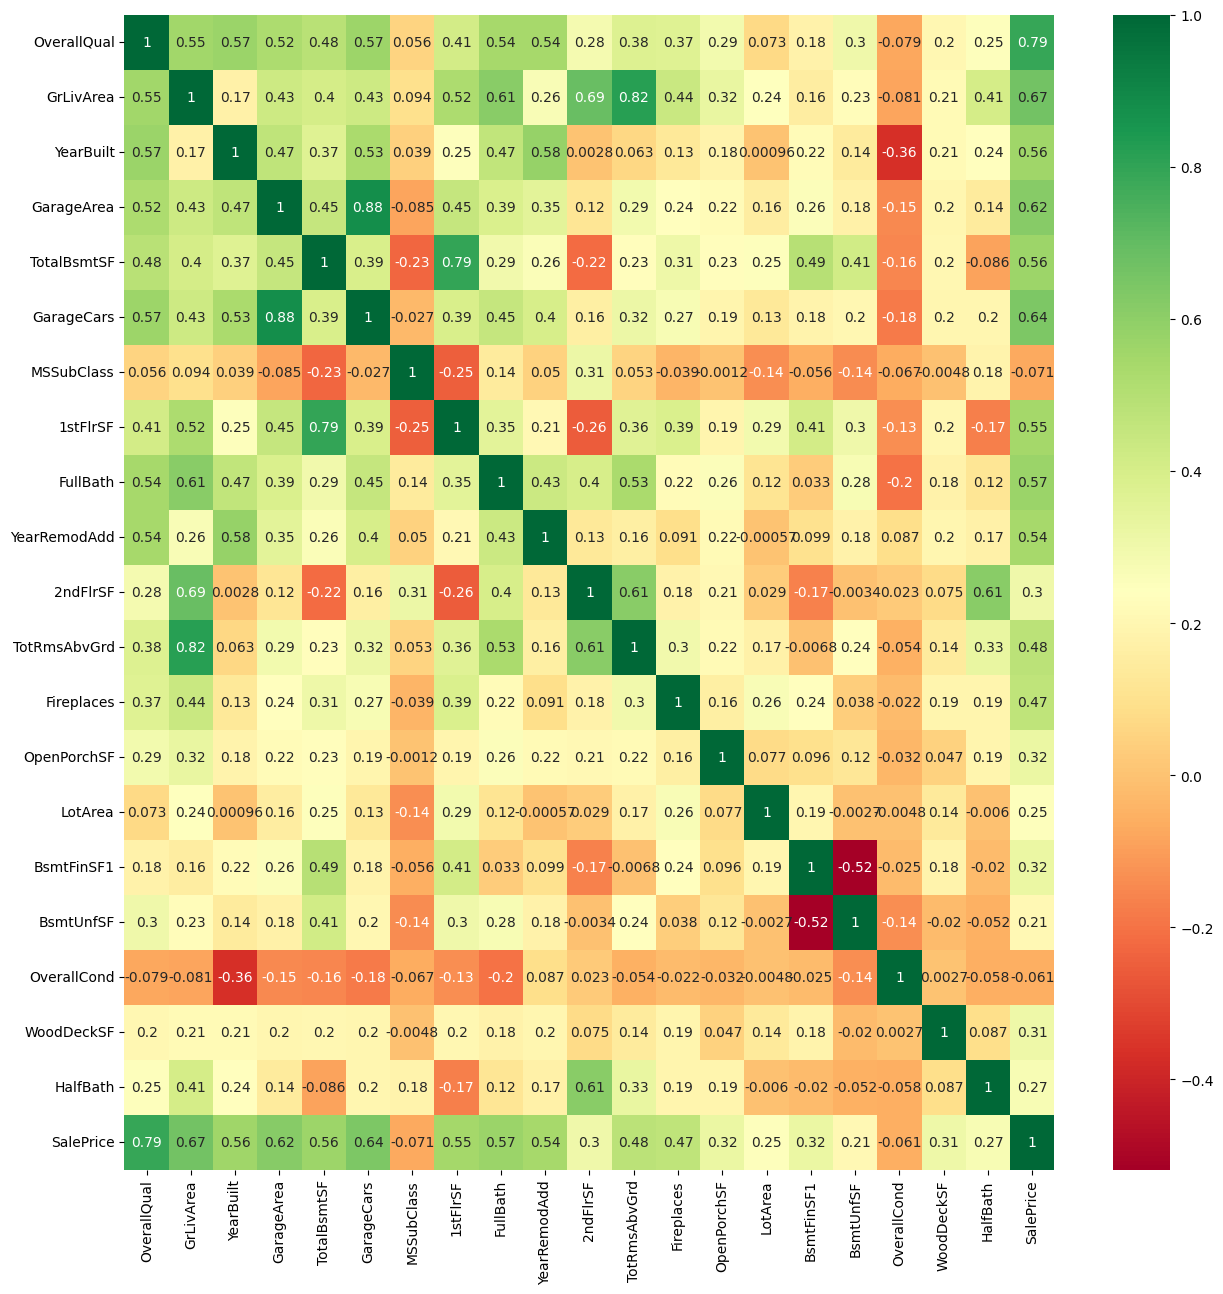

In [266]:
# plot the correlation matrix of the selected features
import seaborn as sns
import matplotlib.pyplot as plt

corr_features = selected_features.append('SalePrice')
df[selected_features].corr()
fig,ax = plt.subplots(figsize=(15,15))

sns.heatmap(df[selected_features].corr(), annot=True , cmap="RdYlGn")


In [267]:
# write a function to remove the columns that are highly correlated with each other
def remove_correlated(df, threshold):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

# write a functio to remove the columns which are not correlated with the target 
def remove_not_correlated(df, target, threshold):
    corr_matrix = df.corr().abs()
    to_drop = corr_matrix[corr_matrix[target] < threshold].index
    return to_drop



# remove columns that are highly correlated with each other
columns_to_drop = remove_not_correlated(df[selected_features], 'SalePrice', 0.5)

columns_to_drop_2 = remove_correlated(df[selected_features], 0.6)

# get the union of the two sets of columns to drop

columns_to_drop = set(columns_to_drop).union(set(columns_to_drop_2))



In [268]:
columns_to_drop

{'1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Fireplaces',
 'FullBath',
 'GarageCars',
 'HalfBath',
 'LotArea',
 'MSSubClass',
 'OpenPorchSF',
 'OverallCond',
 'SalePrice',
 'TotRmsAbvGrd',
 'WoodDeckSF'}

In [277]:
# based on the correlation matrix, we will select features that are not highly correlated with each other

# 1stFLrSF  , TotalBsmtSF , 
# GarageArea , GarageCars
# Yearbuilt , YearRemodAdd,
# YearBuilt , overallQual
# MSSubClass , 1stFlrSF
# MSSubClass , TotalBsmtSF

# we will drop TotalBsmtSF, GarageArea, YearRemodAdd, YearBuilt , 1stFlrSF

# we want to remove ['TotalBsmtSF', 'GarageArea', 'YearRemodAdd', 'YearBuilt'] from the selected_features



selected_features = [item for item in selected_features if item not in columns_to_drop]
selected_features.append('SalePrice')

In [278]:
# scale the nummerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[selected_features]
X = scaler.fit_transform(X)

# then put the scaled data in the  dataframe

df[selected_features] = X


In [279]:
# clean categorical data , drop nans 

df[col_categoircal] = df[col_categoircal].dropna()  

In [280]:
# encode the categorical features as ordinal encoding
# but dont drop them  
# embed categorical columns in ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[col_categoircal] = encoder.fit_transform(df[col_categoircal]) 



In [175]:
df['LandContour']

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
1455    3.0
1456    3.0
1457    3.0
1458    3.0
1459    3.0
Name: LandContour, Length: 1420, dtype: float64

In [176]:
col_categoircal

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [281]:
df.dropna(inplace=True)

In [274]:
df.shape

(1380, 69)

In [285]:
X.shape

(1380, 36)

In [286]:
X = df[selected_features + col_categoircal].drop('SalePrice', axis=1)
y = df['SalePrice']

# split the data into train and test
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

# predict the values

y_pred = model.predict(x_test)

# calculate the mean squared error
# also calculate r squared 
# also calculate absolute error

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print  (f'Mean Squared Error : {mse}')
print  (f'Mean Absolute Error : {mae}')
print  (f'R2 Score : {r2}')

Mean Squared Error : 0.2188505274053719
Mean Absolute Error : 0.29191915860667644
R2 Score : 0.7966840283895427


In [284]:
df[selected_features ]

,OverallQual,GrLivArea,YearBuilt,GarageArea,TotalBsmtSF,YearRemodAdd,SalePrice
0,0.730238,0.452172,1.065976,0.399694,-0.540977,0.892640,0.536566
1,-0.049738,-0.467766,0.172587,-0.027577,0.534878,-0.426930,0.106892
2,0.730238,0.608233,0.999799,0.691015,-0.371384,0.843767,0.775274
3,0.730238,0.466546,-1.845808,0.856097,-0.805966,-0.720168,-0.553533
4,1.510213,1.454248,0.966710,1.798034,0.224841,0.746021,1.196991
...,...,...,...,...,...,...,...
1455,-0.049738,0.322806,0.933622,-0.027577,-0.283938,0.746021,0.003452
1456,-0.049738,1.197569,0.238764,0.166637,1.276848,0.159545,0.560437
1457,0.730238,1.745836,-0.985508,-1.037490,0.243391,1.039259,1.459570
1458,-0.829713,-0.845599,-0.687712,-1.095754,0.047299,0.550529,-0.519716
